In [91]:
# %pip install imbalanced-learn

캐글 신용카드 거래내용이 포함된 데이터 셋을 아래 사이트에서 다운받아 다음 사항을 수행하세요.

https://www.kaggle.com/mlg-ulb/creditcardfraud

데이터 설명
데이터 세트에는 유럽 카드 소지자가 2013년 9월에 신용 카드로 거래한 내용이 포함되어 있습니다. 이 데이터 세트는 284,807건의 거래 중 492건의 사기가 발생한 이틀 동안 발생한 거래를 보여줍니다. 데이터 세트는 매우 불균형하며 긍정적 클래스(사기)는 모든 거래의 0.172%를 차지합니다.

여기에는 PCA 변환의 결과인 숫자 입력 변수만 포함됩니다. 안타깝게도 기밀 문제로 인해 데이터에 대한 원래 기능과 추가 배경 정보를 제공할 수 없습니다. 기능 V1, V2, … V28은 PCA로 얻은 주요 구성 요소이며 PCA로 변환되지 않은 유일한 기능은 '시간'과 '양'입니다. 기능 '시간'에는 각 트랜잭션과 데이터 세트의 첫 번째 트랜잭션 사이에 경과된 초가 포함됩니다. 'Amount' 기능은 거래 금액이며, 이 기능은 예제 종속 비용에 민감한 학습에 사용할 수 있습니다. 기능 'Class'는 응답 변수이며 사기의 경우 값 1, 그렇지 않은 경우 0을 취합니다.

- 데이터 전처리 후 로지스틱 리그레션을 적용한 모델 학습 및 평가(정확도, 정밀도, 재현율, F1 score, AUC)
- Amount 피처를 정규분포 및 로그 변환 후 모델 학습 및 평가
- 상관성이 높은 피처 한개를 선택하여 이상치 데이터 제거 후 모델 학습 및 평가
- SMOTE 오버 샘플링 적용 후 모델 학습 및 평가
- SMOTE 적용 시 인사이트 요약

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
dataset = pd.read_csv('../../bigdatafile/creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [94]:
# 평가용 함수 만들기
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
def scores(y_test,pred=None,pred_proba=None):
    cf_m = confusion_matrix(y_test,pred)
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred)
    rec = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc = roc_auc_score(y_test,pred_proba)
    print(f'혼동행렬 : \n{cf_m}\n 정확도 : {acc:.4f}, 정밀도 : {pre:.4f}, 재현율 : {rec:.4f}, f1 점수 : {f1:.4f}, roc_auc : {roc:.4f}')

In [3]:
# Time은 초단위이기에 시간으로 변환하기로 결정
dataset['hour']=dataset['Time']//3600
dt_1 = dataset.drop('Time',axis=1)
dt_1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.0


In [96]:
# 훈련, 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split
X = dt_1.drop('Class',axis=1)
y = dt_1['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 125)

In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10)
lr.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [98]:
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]
print('기본 로지스틱회귀 평가점수')
scores(y_test,pred,pred_proba)

기본 로지스틱회귀 평가점수
혼동행렬 : 
[[56849    10]
 [   41    62]]
 정확도 : 0.9991, 정밀도 : 0.8611, 재현율 : 0.6019, f1 점수 : 0.7086, roc_auc : 0.9424


In [4]:
# Amount를 정규분포로 변환 후 학습 및 평가
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
dt_2 = dt_1.copy()
dt_2['Amount']=sd.fit_transform(dt_2[['Amount']])
dt_2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0,47.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0,47.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0,47.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0,47.0


In [100]:
X_sd = dt_2.drop('Class',axis=1)
y_sd = dt_2['Class']

X_train,X_test,y_train,y_test = train_test_split(X_sd,y_sd,test_size = 0.2,random_state = 125)
lr.fit(X_train,y_train)
pred_sd = lr.predict(X_test)
pred_proba_sd = lr.predict_proba(X_test)[:,1]
print('Amount 정규분포변환 로지스틱회귀 평가점수')
scores(y_test,pred_sd,pred_proba_sd)

Amount 정규분포변환 로지스틱회귀 평가점수
혼동행렬 : 
[[56849    10]
 [   39    64]]
 정확도 : 0.9991, 정밀도 : 0.8649, 재현율 : 0.6214, f1 점수 : 0.7232, roc_auc : 0.9653


In [5]:
# Amount 로그변환후 학습 및 평가
import numpy as np
dt_2['Amount'] = np.log1p(dt_1['Amount'])
dt_2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.570980,0,47.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.249987,0,47.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.232366,0,47.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.397895,0,47.0


In [102]:
X_log = dt_2.drop('Class',axis=1)
y_log = dt_2['Class']

X_train,X_test,y_train,y_test = train_test_split(X_log,y_log,test_size = 0.2,random_state = 125)
lr.fit(X_train,y_train)
pred_sd = lr.predict(X_test)
pred_proba_sd = lr.predict_proba(X_test)[:,1]
print('Amount 로그변환 로지스틱회귀 평가점수')
scores(y_test,pred_sd,pred_proba_sd)

Amount 로그변환 로지스틱회귀 평가점수
혼동행렬 : 
[[56849    10]
 [   39    64]]
 정확도 : 0.9991, 정밀도 : 0.8649, 재현율 : 0.6214, f1 점수 : 0.7232, roc_auc : 0.9645


In [103]:
# 상관성이 제일 높은것은 V17
dt_1.corr().sort_values(by='Class')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
V17,-3.879840e-16,-2.685296e-16,7.614712e-16,-2.699612e-16,1.281914e-16,2.015618e-16,2.177192e-16,-2.269549e-16,1.113695e-15,1.542955e-15,...,-8.743398e-16,3.706214e-16,-2.403828e-16,2.666806e-16,6.932833e-16,6.148525e-16,-5.534540e-17,0.007309,-0.326481,-0.073450
V14,-5.020280e-16,-1.730566e-16,4.739859e-16,2.282280e-16,6.565143e-16,2.621312e-16,2.607772e-16,-8.599156e-16,3.784757e-15,2.635936e-16,...,3.740383e-16,3.883204e-16,2.003482e-16,-8.547932e-16,-1.660327e-16,1.044274e-16,2.289427e-15,0.033751,-0.302544,-0.098449
V12,2.053457e-16,-9.568710e-17,6.310231e-16,-5.625518e-16,7.412552e-16,2.375468e-16,-3.536655e-18,1.839891e-16,-1.079314e-15,1.771869e-15,...,1.644699e-16,1.800885e-16,4.436512e-16,-5.712973e-16,-2.359969e-16,-4.672391e-16,6.415167e-16,-0.009542,-0.260593,0.123680
V10,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,...,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502,-0.216883,0.030552
V16,7.212815e-17,1.177316e-17,8.299445e-16,-9.614528e-16,2.246261e-15,2.623672e-18,5.869302e-17,-5.254741e-16,-1.214086e-15,3.545450e-16,...,-7.923387e-17,5.020770e-16,-3.005985e-16,-1.345418e-15,-7.290010e-16,6.789513e-16,7.588849e-16,-0.003910,-0.196539,0.012178
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961,-0.419601
V7,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,...,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257,0.084751
V18,3.230206e-17,3.284605e-16,1.509897e-16,-5.103644e-16,5.308590e-16,1.223814e-16,7.604126e-17,-3.667974e-16,4.993240e-16,3.902423e-16,...,-4.819365e-16,-1.912006e-16,-8.986916e-17,-6.629212e-17,2.990167e-16,2.242791e-16,7.976796e-16,0.035650,-0.111485,0.090525
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347,0.117666
V9,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,...,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733,-0.008041


<AxesSubplot:>

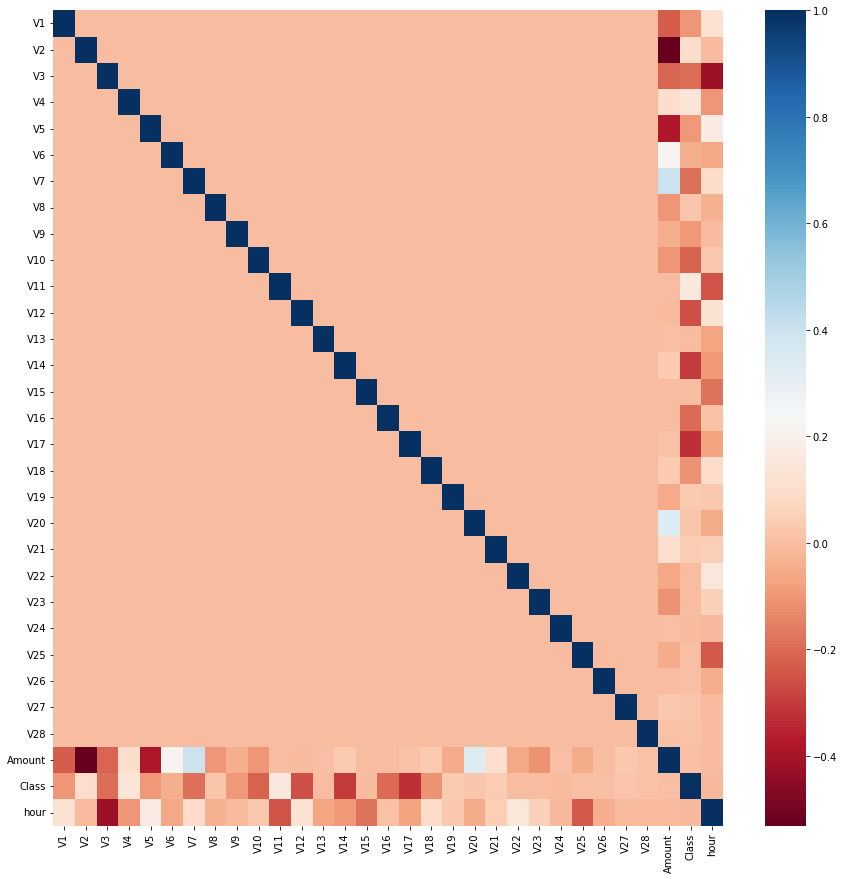

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
corr = dt_1.corr()
sns.heatmap(corr,cmap="RdBu")


<AxesSubplot:>

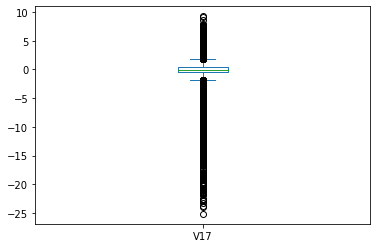

In [18]:
dt_1['V17'].plot(kind='box')

In [46]:
dt_1.V17.describe()

count    2.848070e+05
mean    -7.466538e-16
std      8.493371e-01
min     -2.516280e+01
25%     -4.837483e-01
50%     -6.567575e-02
75%      3.996750e-01
max      9.253526e+00
Name: V17, dtype: float64

In [47]:
Q1 = -4.837483e-01
Q2 = -6.567575e-02
Q3 = 3.996750e-01
IQR = Q3 - Q1
LC = Q1 - (1.5*IQR)
UC = Q3 + (1.5*IQR)
LC, UC

(-1.80888325, 1.72480995)

In [38]:
Q3

0.399675

In [50]:
   np.percentile(dt_1.V17.values, 25)

-0.483748313707048

In [53]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
get_outlier(dt_1,'V17', weight=1.5)


In [55]:
get_outlier(dt_1,'V14', weight=1.5)

Int64Index([    82,    102,    104,    108,    146,    161,    181,    190,
               225,    245,
            ...
            284620, 284630, 284635, 284638, 284662, 284669, 284721, 284758,
            284782, 284802],
           dtype='int64', length=14149)

In [14]:
dt_3 = dt_2.copy()
dt_3.V17.loc[dt_2.V17<LC].describe()

count    757.000000
mean      -6.418671
std        5.559171
min      -25.162799
25%       -9.518038
50%       -3.807201
75%       -2.138984
max       -1.810721
Name: V17, dtype: float64

In [15]:
dt_3.V17.loc[dt_2.V17>UC].describe()

count    6663.000000
mean        2.441401
std         0.797611
min         1.724833
25%         1.907981
50%         2.182830
75%         2.692641
max         9.253526
Name: V17, dtype: float64

In [107]:
# 이상치를 이상치가 아닌 최댓값, 최솟값으로 대체
dt_3.V17.loc[dt_2.V17<LC] = LC
dt_3.V17.loc[dt_2.V17>UC] = UC

In [108]:
X_rp = dt_3.drop('Class',axis=1)
y_rp = dt_3['Class']

X_train,X_test,y_train,y_test = train_test_split(X_rp,y_rp,test_size = 0.2,random_state = 125)
lr.fit(X_train,y_train)
pred_sd = lr.predict(X_test)
pred_proba_sd = lr.predict_proba(X_test)[:,1]
print('이상치 대체 로지스틱회귀 평가점수')
scores(y_test,pred_sd,pred_proba_sd)

이상치 대체 로지스틱회귀 평가점수
혼동행렬 : 
[[56850     9]
 [   41    62]]
 정확도 : 0.9991, 정밀도 : 0.8732, 재현율 : 0.6019, f1 점수 : 0.7126, roc_auc : 0.9408


In [109]:
#SMOTE 오버 샘플링 적용 후 모델 학습 및 평가
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
lr.fit(X_train_over,y_train_over)

LogisticRegression(random_state=10)

In [110]:
pred_sd = lr.predict(X_test)
pred_proba_sd = lr.predict_proba(X_test)[:,1]
print('SMOTE 오버샘플링 로지스틱회귀 평가점수')
scores(y_test,pred_sd,pred_proba_sd)

SMOTE 오버샘플링 로지스틱회귀 평가점수
혼동행렬 : 
[[55607  1252]
 [   15    88]]
 정확도 : 0.9778, 정밀도 : 0.0657, 재현율 : 0.8544, f1 점수 : 0.1220, roc_auc : 0.9735


SMOTE 오버샘플링을 적용한 경우 재현율은 많이 상승하지만 그 이상으로 정밀도가 낮아지는 것이 일반적이며, 좋은 SMOTE패키지일수록 재현율은 개선하고 정밀도감소율은 낮출 수 있도록 효과적으로 데이터를 증식한다.